# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기




### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기





### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df['gender'].value_counts() #M,F의 갯수를 찾아냄

M    305
F    175
Name: gender, dtype: int64

In [ ]:
df['NationalITy'].value_counts() #국가 갯수를 나타냄

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [ ]:
df['PlaceofBirth'].value_counts() #탄생국가 갯수를 나타냄

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

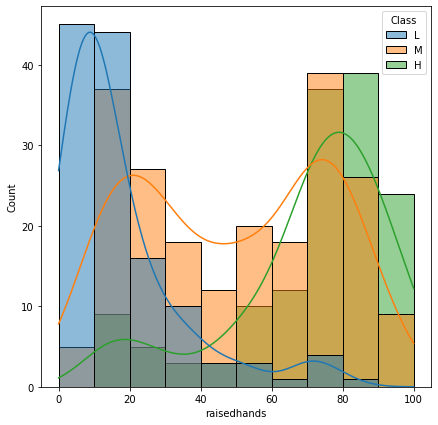

In [ ]:
# raise hands 히스토그램
plt.figure(figsize = (7,7))
sns.histplot(x = 'raisedhands', data= df, hue = 'Class', hue_order=['L','M','H'], kde = True)

#아주 쌍봉으로 나타남
# class L 과 class H 가 확연하게 나눠짐
# 손을 만이 든 학생이 성적이 좋을 것 이다

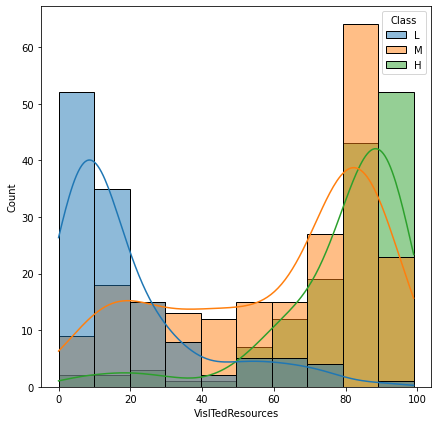

In [ ]:
# visitedresources 히스토그램
plt.figure(figsize = (7,7))
sns.histplot(x = 'VisITedResources', data= df, hue = 'Class', hue_order=['L','M','H'], kde = True)

#수업 외적으로 rescources에 참가하는 것이 성적에 영향이 있긴 있음 raise hands 보다 더 나은 듯

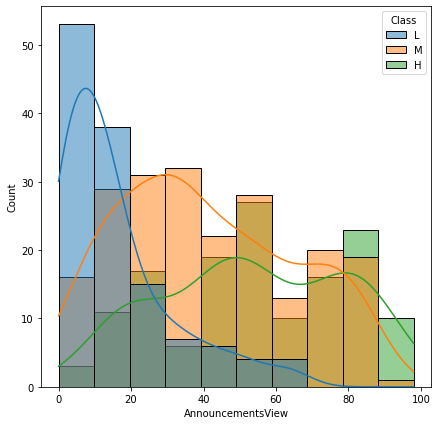

In [ ]:
# AnnouncementsView 히스토그램
plt.figure(figsize = (7,7))
sns.histplot(x = 'AnnouncementsView', data= df, hue = 'Class', hue_order=['L','M','H'], kde = True)

#성적이 나쁜 아이들은 항상 모든지 다 낮음
#중간이나 잘하는 애들에게는 큰 연관성이 없는 것 같음

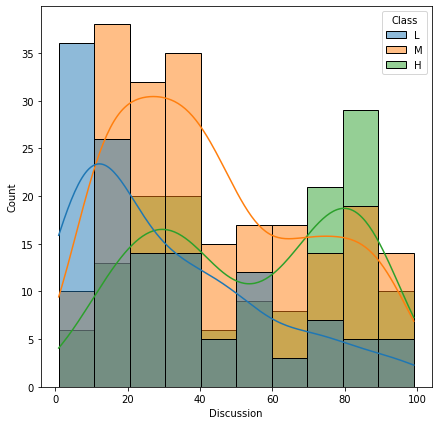

In [ ]:
# Discussion 히스토그램
plt.figure(figsize = (7,7))
sns.histplot(x = 'Discussion', data= df, hue = 'Class', hue_order=['L','M','H'], kde = True)

#다른 데이터 대비해서 특별한 경향성이 보이지는 않는 것 같음

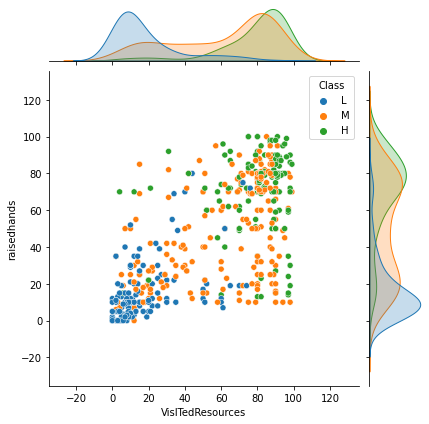

In [ ]:
# Joint Plot

sns.jointplot(x = 'VisITedResources', y= 'raisedhands', data =df,  hue = 'Class', hue_order = ['L','M','H'])

# Low와 Middle은 구분하기 쉬워보이지만 M과 H는 여기서도 구분이 힘듦

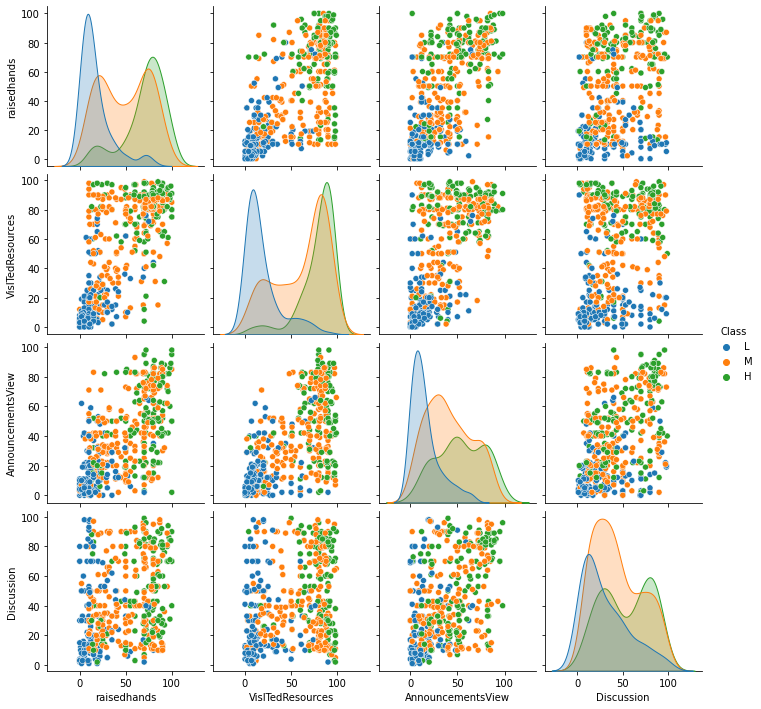

In [ ]:
# Pair Plot

sns.pairplot(df, hue = 'Class', hue_order = ['L','M','H'])

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


In [ ]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인





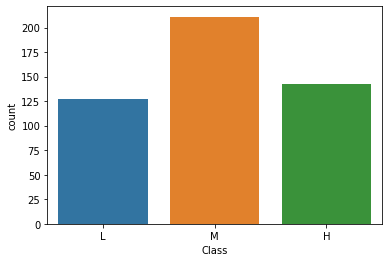

In [ ]:
sns.countplot(x = 'Class', data = df, order = ['L','M','H'])

# 전체적인 L, M , H의 수를 파악하기

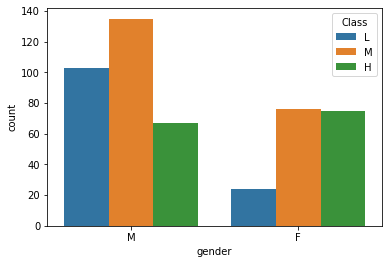

In [ ]:
sns.countplot( x = 'gender', data = df, hue = 'Class', hue_order = ['L','M','H'])

#남녀 간 성적비율 비교

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

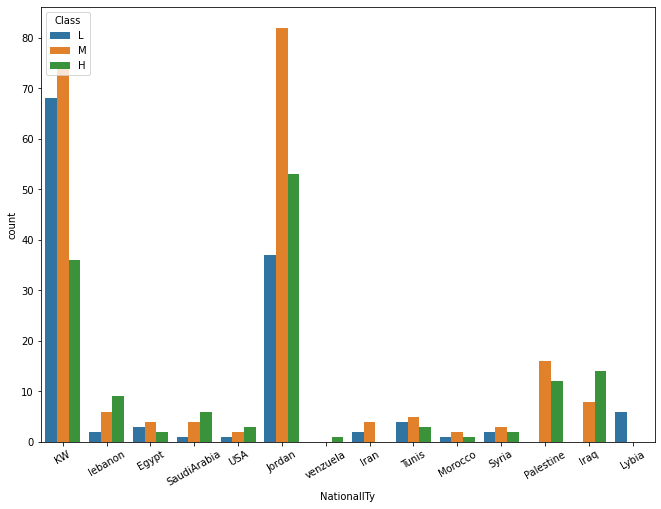

In [ ]:
#국적 간 성적비교
plt.figure(figsize=(11,8))
sns.countplot( x = 'NationalITy', data = df, hue = 'Class', hue_order = ['L','M','H'])
plt.xticks(rotation = 30)
plt.show()

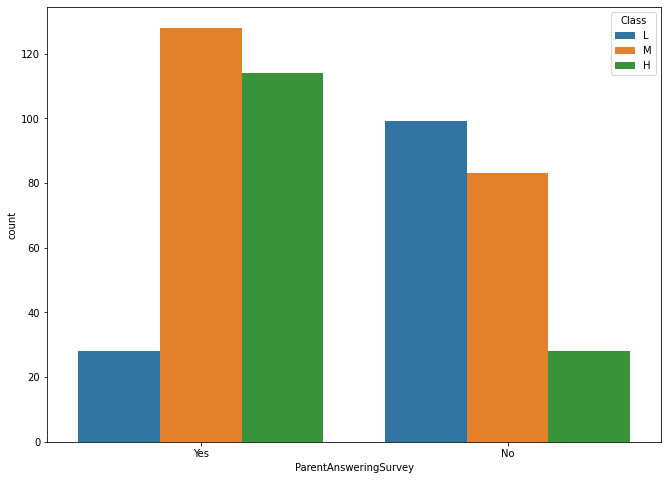

In [41]:
# 부모 응답
plt.figure(figsize=(11,8))
sns.countplot( x = 'ParentAnsweringSurvey', data = df, hue = 'Class', hue_order = ['L','M','H'])
plt.show()

#부모가 얼마나 관심있느냐가 학생 성적에 상당한 상관성을 가지고 있음을 보여줌

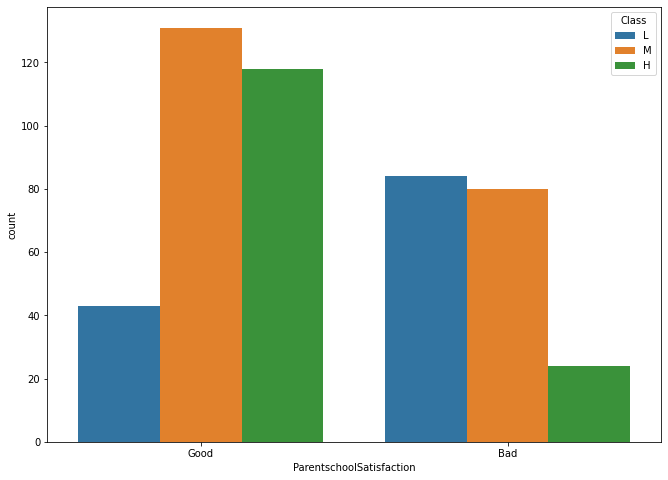

In [42]:
# 부모 만족여부
plt.figure(figsize=(11,8))
sns.countplot( x = 'ParentschoolSatisfaction', data = df, hue = 'Class', hue_order = ['L','M','H'])
plt.show()

#성적이 좋아서 만족하지는 않았을까? 

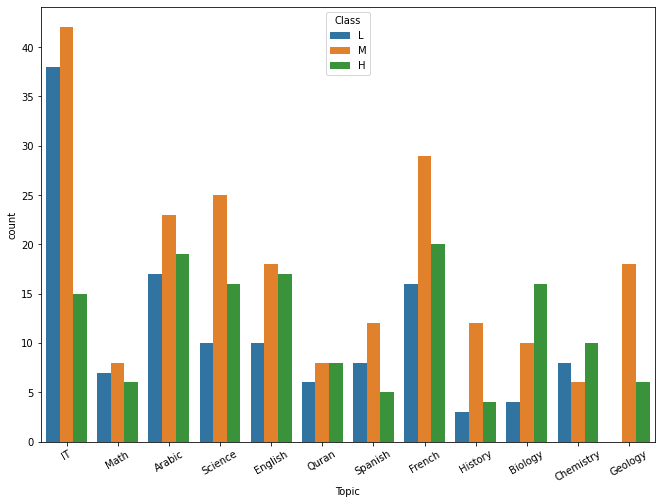

In [43]:
# 주제
plt.figure(figsize=(11,8))
sns.countplot( x = 'Topic', data = df, hue = 'Class', hue_order = ['L','M','H'])
plt.xticks(rotation = 30)
plt.show()

#IT 쪽 성적이 낮음
# BIOLOGY가 성적이 좋게 나옴

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [44]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

#클래스를 변환해줄 거임
df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))

In [45]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [46]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# gender 별로 평균 점수가 나타나게 됨
gb =  df.groupby('gender').mean()['Class_value']
gb

gender
F    0.291429
M   -0.118033
Name: Class_value, dtype: float64

<BarContainer object of 2 artists>

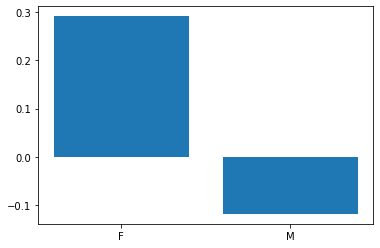

In [47]:
plt.bar(gb.index,gb)

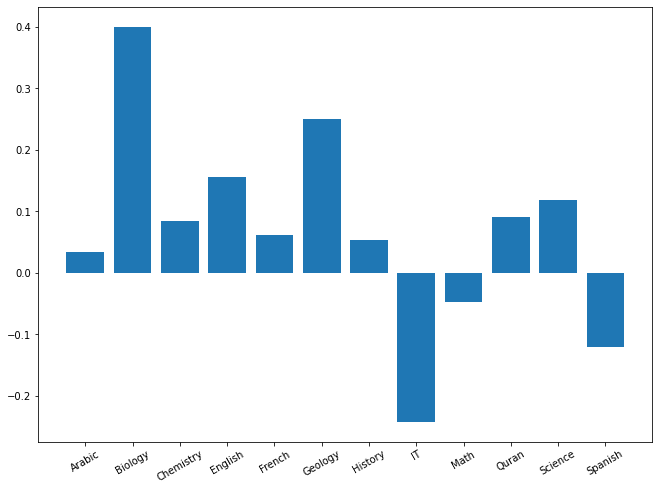

In [48]:
# 어떤 주제를 선택한 학생이 성적이 좋은 지

gb = df.groupby('Topic').mean()['Class_value']
plt.figure(figsize=(11,8))
plt.bar(gb.index, gb)
plt.xticks(rotation = 30)
plt.show()

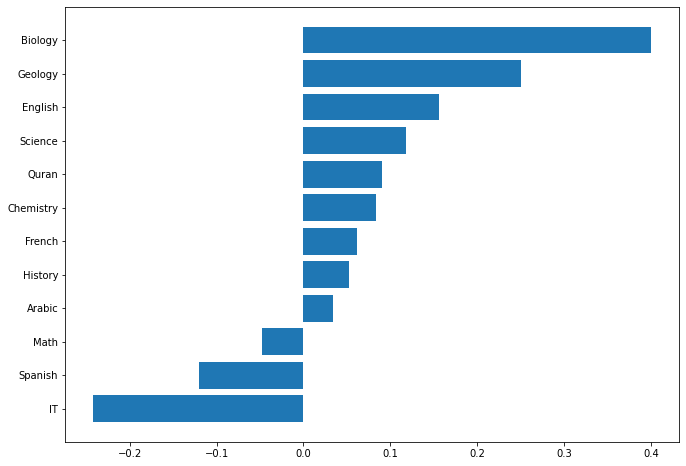

In [49]:
# 어떤 주제를 선택한 학생이 성적이 좋은 지

gb = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.figure(figsize=(11,8))
plt.barh(gb.index, gb)
plt.show()

<BarContainer object of 2 artists>

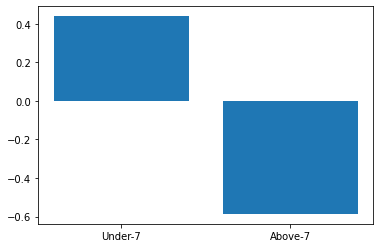

In [50]:
gb = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending = False)
plt.bar(gb.index, gb)

#성실이 최고다 라는 것을 보여줌

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [ ]:
df.columns

#범주형 데이터를 one-hot 벡터로 바꿀 예정

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [53]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

#부모만족도는 빼기로 했음 (위의 결과에 의해)
X = pd.get_dummies(data = df.drop(['ParentschoolSatisfaction','Class','Class_value'],axis=1), 
                   columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                              'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey','StudentAbsenceDays' ],
                   drop_first = True) #다중공선성을 제거하기 위해 drop_first = True로 설정

# X는 feature로 사용할 것이기 때문에 사용하지 않을 feature는 전부 drop으로 날려버림, 그 후 원핫벡터로 변환시킬 컬럼을 설정하고 drop_first = True로 설정해줌
y = df['Class']

In [55]:
X.shape

(480, 59)

### 문제 9. 학습데이터와 테스트데이터 분리하기


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [59]:
from sklearn.linear_model import LogisticRegression

In [65]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #그냥 이렇게 돌릴 경우 iteration을 증가시키라고 뜸

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model_lr = LogisticRegression(max_iter = 1e4)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000.0,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 11. 모델 학습 결과 평가하기


In [67]:
from sklearn.metrics import classification_report

In [68]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.78      0.76      0.77        33
           M       0.59      0.68      0.63        56

    accuracy                           0.69       144
   macro avg       0.72      0.70      0.71       144
weighted avg       0.70      0.69      0.70       144



### 문제 12. XGBoost 모델 생성/학습하기


In [69]:
from xgboost import XGBClassifier

In [70]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 13. 모델 학습 결과 평가하기


In [71]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.83      0.64      0.72        55
           L       0.79      0.82      0.81        33
           M       0.62      0.75      0.68        56

    accuracy                           0.72       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.74      0.72      0.72       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [73]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [72]:
model_lr.coef_.shape
# H, L, M의 Feature간 상관계수

(3, 59)

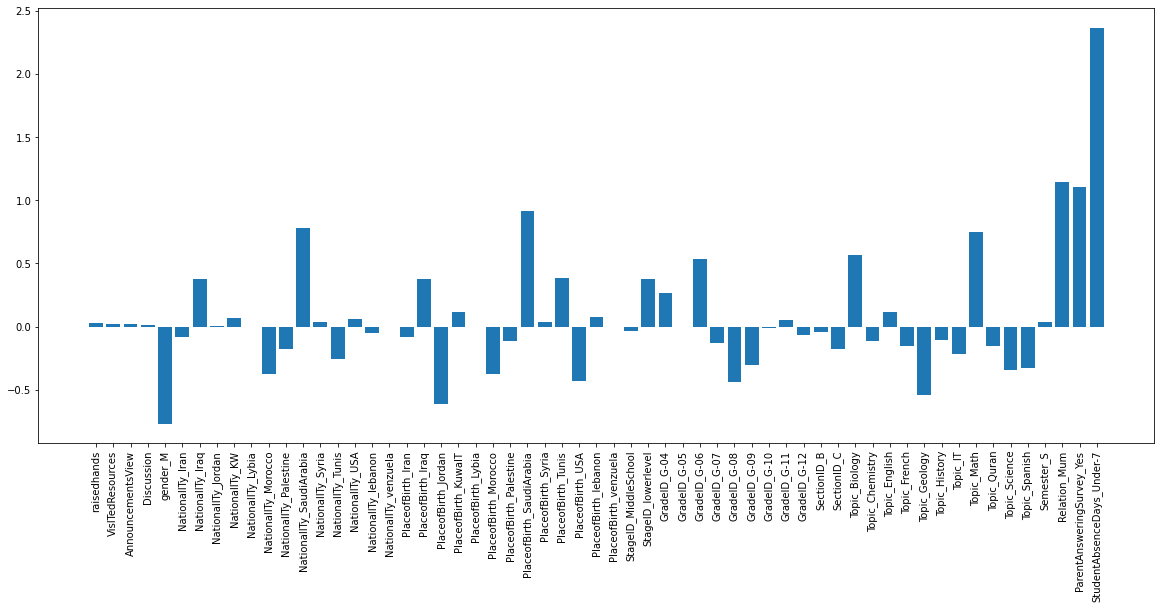

In [79]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar(X.columns, model_lr.coef_[0,:]) # H 번째
plt.show()

# 상위 성적이랑 상관계수가 가장 높은 feature는 7일이하결석 변수

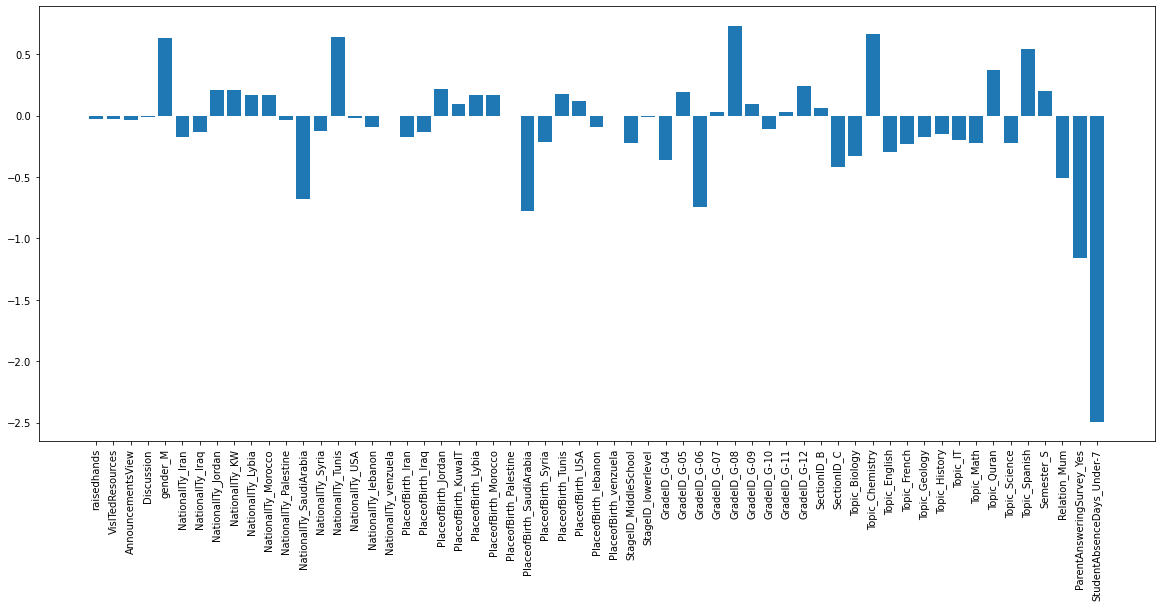

In [80]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar(X.columns, model_lr.coef_[1,:]) # L 성적
plt.show()



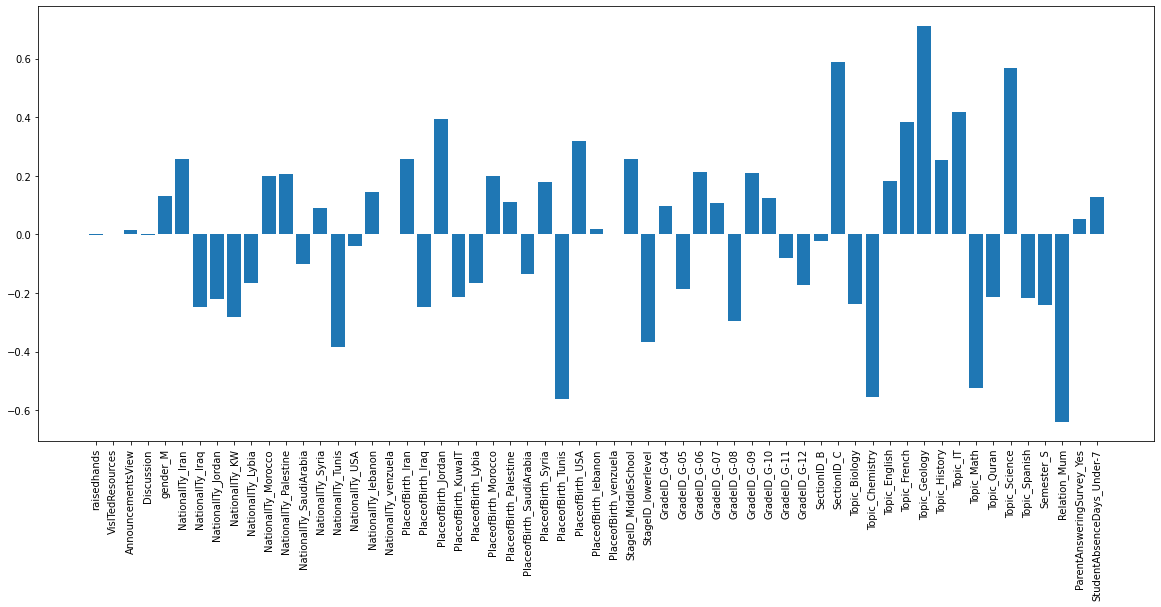

In [81]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar(X.columns, model_lr.coef_[2,:]) # M 성적
plt.show()



### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

In [89]:
model_xgb.feature_importances_

array([0.0682366 , 0.07257808, 0.04284223, 0.02250875, 0.03653632,
       0.        , 0.021145  , 0.01796043, 0.02348848, 0.        ,
       0.        , 0.0202155 , 0.01441174, 0.        , 0.05652613,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03777369, 0.        , 0.        , 0.        , 0.01210805,
       0.02558899, 0.        , 0.011869  , 0.        , 0.        ,
       0.        , 0.03062109, 0.01786442, 0.01617423, 0.        ,
       0.02489228, 0.        , 0.01727275, 0.        , 0.        ,
       0.        , 0.        , 0.01116914, 0.01013707, 0.        ,
       0.0109954 , 0.        , 0.        , 0.03147826, 0.016164  ,
       0.01552173, 0.02016795, 0.01196981, 0.01338917, 0.00764623,
       0.02037812, 0.0722457 , 0.03413326, 0.13399042], dtype=float32)

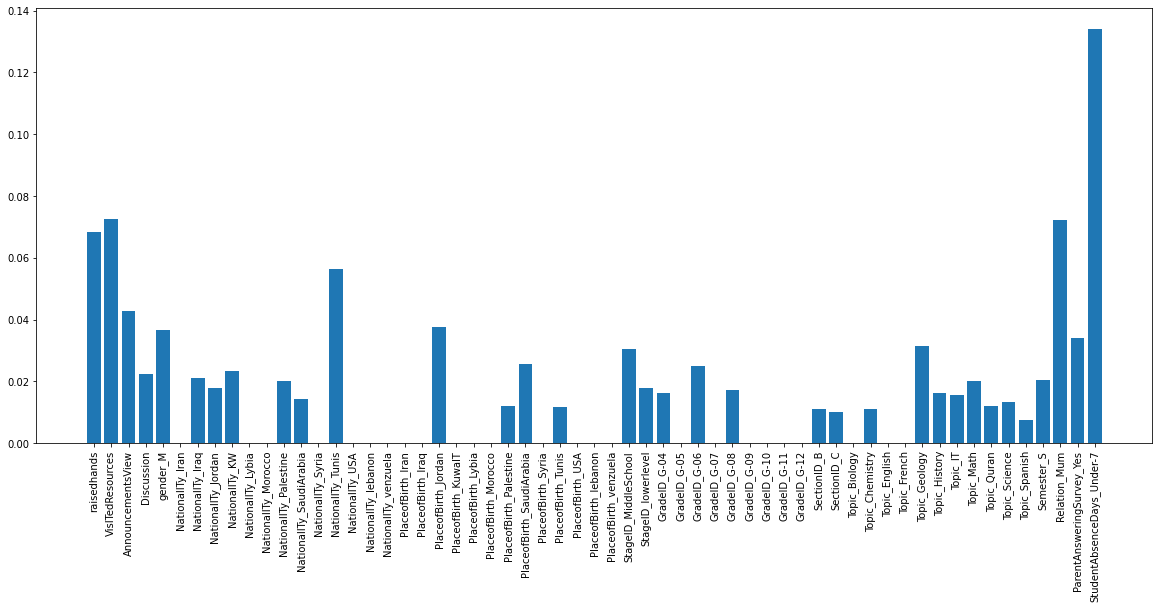

In [83]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기


plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.bar(X.columns, model_xgb.feature_importances_) 
plt.show()


# 성실이 최고라고 말하고있음
